In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [72]:
data = pd.read_csv("/home/ajaykumar/ML/ANN/ANN code/Iris (1).csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [73]:
data['Species'] = data['Species'].map({'Iris-setosa':0,'Iris-versicolor' : 1,'Iris-virginica' : 2})
X = data.iloc[:,1:5].values
Y = data.iloc[:,5].values
Y = np.eye(3)[Y]
# print(X)
print(Y.shape)

(150, 3)


In [74]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
X_train = X_train.T
X_test = X_test.T
Y_train = Y_train.T
Y_test = Y_test.T
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4, 120)
(3, 120)
(4, 30)
(3, 30)


In [75]:
def relu(x):
    return np.maximum(0,x)
def tanh(x):
    return np.tanh(x);
def softmax(x):
    expX = np.exp(x)
    return expX/np.sum(expX,axis=0)
def derivative_tanh(x):
    return 1 - np.power(tanh(x),2)
def derivative_relu(x):
    return np.array(x>0,dtype=np.float32)

In [76]:
def initialise_parameters(n_x,n_h,n_y):
    w1 = np.random.randn(n_h,n_x)*0.001
    b1 = np.zeros((n_h,1))

    w2 = np.random.randn(n_y,n_h)*0.001
    b2 = np.zeros((n_y,1))

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    return parameters


In [77]:
def forward_prop(x,parameters):
    w1 = parameters['w1']
    b1 = parameters['b1']

    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = np.dot(w1,x)+b1
    a1 = relu(z1)

    z2 = np.dot(w2,a1)+b2
    a2 = softmax(z2)

    forward_cache = {
        "z1" : z1,
        "a1" : a1,
        "z2" : z2,
        "a2" : a2
    }

    return forward_cache

In [78]:
def cost_func(a2,y):
    m = y.shape[1]
    cost = -(1/m)*np.sum(y*np.log(a2))
    return cost

In [79]:
def backward_prop(x,y,parameters,forward_cache):

    m = x.shape[1]

    w1 = parameters['w1']
    b1 = parameters['b1']

    w2 = parameters['w2']
    b2 = parameters['b2']

    z1 = forward_cache['z1']
    a1 = forward_cache['a1']

    z2 = forward_cache['z2']
    a2 = forward_cache['a2']

    dz2 = a2-y
    dw2 = (1/m)*np.dot(dz2,a1.T)
    db2 = (1/m)*np.sum(dz2,axis=1,keepdims=True)

    dz1 = np.dot(w2.T,dz2)*derivative_relu(z1)
    dw1 = (1/m)*np.dot(dz1,x.T)
    db1 = (1/m)*np.sum(dz1,axis=1,keepdims=True)

    gradients = {
        "dw1" : dw1,
        "db1" : db1,
        "dw2" : dw2,
        "db2" : db2
    }

    return gradients

In [80]:
def update_parameters(parameters,gradients,learning_rate):
    w1 = parameters['w1']
    b1 = parameters['b1']

    w2 = parameters['w2']
    b2 = parameters['b2']

    dw1 = gradients['dw1']
    db1 = gradients['db1']

    dw2 = gradients['dw2']
    db2 = gradients['db2']

    w1 = w1 - learning_rate*dw1
    b1 = b1 -learning_rate*db1

    w2 = w2 - learning_rate*dw2
    b2 = b2 - learning_rate*db2

    parameters = {
        "w1" : w1,
        "b1" : b1,
        "w2" : w2,
        "b2" : b2
    }
    return parameters

In [81]:
def model(x,y,n_h,learning_rate,epochs):
    n_x = x.shape[0]
    n_y = y.shape[0]

    cost_list = []
    parameters = initialise_parameters(n_x,n_h,n_y)

    for i in range(epochs):
        forward_cache = forward_prop(x,parameters)
        a2 = forward_cache['a2']
        cost = cost_func(a2,y)
        cost_list.append(cost)
        gradients = backward_prop(x,y,parameters,forward_cache)
        parameters = update_parameters(parameters,gradients,learning_rate)
    
    return parameters,cost_list

In [82]:
learning_rate = 0.15
epochs = 100
n_h = 20
parameters,cost_list = model(X_train,Y_train,n_h=n_h,learning_rate=learning_rate,epochs=epochs)
cost_list

[1.098614362096194,
 1.0985922370511776,
 1.0985722955837425,
 1.0985542547643192,
 1.0985379510731381,
 1.098523029985826,
 1.0985087763904473,
 1.0984954613511797,
 1.0984819146513305,
 1.0984685556868143,
 1.0984551400869966,
 1.0984400704023696,
 1.098423852046055,
 1.0984048334957601,
 1.0983810006697103,
 1.0983523429218693,
 1.0983168753025063,
 1.09827015798997,
 1.098210591890064,
 1.0981294487238105,
 1.0980246873636519,
 1.0978833411375122,
 1.0976962856603938,
 1.0974403717108099,
 1.0971034397117911,
 1.0966454366462672,
 1.09603665944873,
 1.095211219208328,
 1.0941211808174702,
 1.0926603348447488,
 1.0907439213989805,
 1.0882205016322055,
 1.0849749754412215,
 1.0808125440215068,
 1.0756234413152714,
 1.069228307392441,
 1.0615606515668048,
 1.052494907508152,
 1.0419863780503142,
 1.0299434385789836,
 1.0161447005469575,
 1.0003015977834488,
 0.9820704574059095,
 0.9613015537125466,
 0.9396148768775895,
 0.9177382020038382,
 0.8965915409586062,
 0.87984131600186,
 0.86

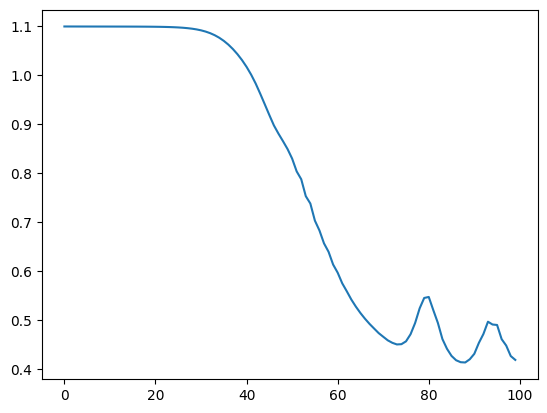

In [83]:
rng = np.arange(0,epochs)
plt.plot(rng,cost_list)
plt.show()

In [84]:
def accuracy(x,y,parameters):
    forward_cache = forward_prop(x,parameters)
    a2 = forward_cache['a2']
    a2 = np.argmax(a2,0)
    y = np.argmax(y,0)
    acc = np.mean(a2 == y)*100
    return acc

In [85]:
acc = accuracy(X_train,Y_train,parameters)
print(acc)
acc2 = accuracy(X_test,Y_test,parameters)
print(acc2)

70.83333333333334
80.0


In [86]:
idx = np.random.randint(0,X_test.shape[1])
forward_cache = forward_prop(X_test[:,idx].reshape(X_test.shape[0],1),parameters)
a2 = forward_cache['a2']
a2 = np.argmax(a2)
print(a2)
if a2 == 0 :
    print("Iris-setosa")
elif a2 == 1:
    print("Iris-versicolor")
elif a2 == 2:
    print("Iris-virginica")

1
Iris-versicolor


In [87]:
forward_cache1 = forward_prop(X_test,parameters)
a_out = forward_cache1['a2']
print(a_out.shape)
Y_pred = np.argmax(a_out,0)
Y_test = np.argmax(Y_test,0)

(3, 30)


In [88]:
report  = classification_report(Y_test,Y_pred)
report

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       0.60      1.00      0.75         9\n           2       1.00      0.45      0.62        11\n\n    accuracy                           0.80        30\n   macro avg       0.87      0.82      0.79        30\nweighted avg       0.88      0.80      0.79        30\n'